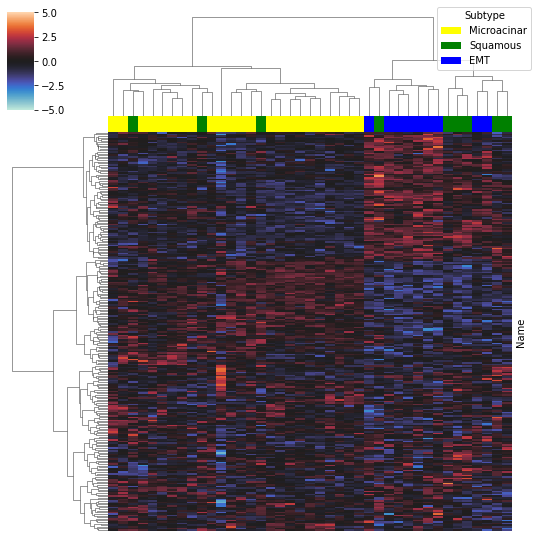

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df = pd.read_csv("Top_Myc_Locations_ssGSEA.csv")
#network_pal = sns.light_palette('blue', len(df.Name.unique()))
#network_lut = dict(zip(df.Name.unique(), network_pal))
#networks = df.Name
#network_colors = pd.Series(networks).map(network_lut)
df = df.set_index('Name')


X = ['Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Green',
'Green',
'Green',
'Yellow',
'Blue',
'Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Blue',
'Yellow',
'Green',
'Green',
'Yellow',
'Blue',
'Green',
'Blue',
'Blue',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Blue',
'Yellow',
'Blue']
# Standardize or Normalize every column in the figure

# Normalize
c1 = sns.clustermap(df,
               figsize=(7.5,7.5),
                    linewidths=0,
                    yticklabels=False,
                    xticklabels=False,
                    col_colors=X,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")

lut = {"Microacinar":"Yellow", "Squamous":"Green", "EMT":"Blue"}
handles = [Patch(facecolor=lut[name]) for name in lut]

plt.legend(handles, lut, title='Subtype', fontsize="medium",
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='best')

fig = c1.fig
fig.savefig("Myc_C1_Pathway.png", dpi=1200)
#plt.legend(labels=["Legend_Day1","Legend_Day2"])
plt.show()

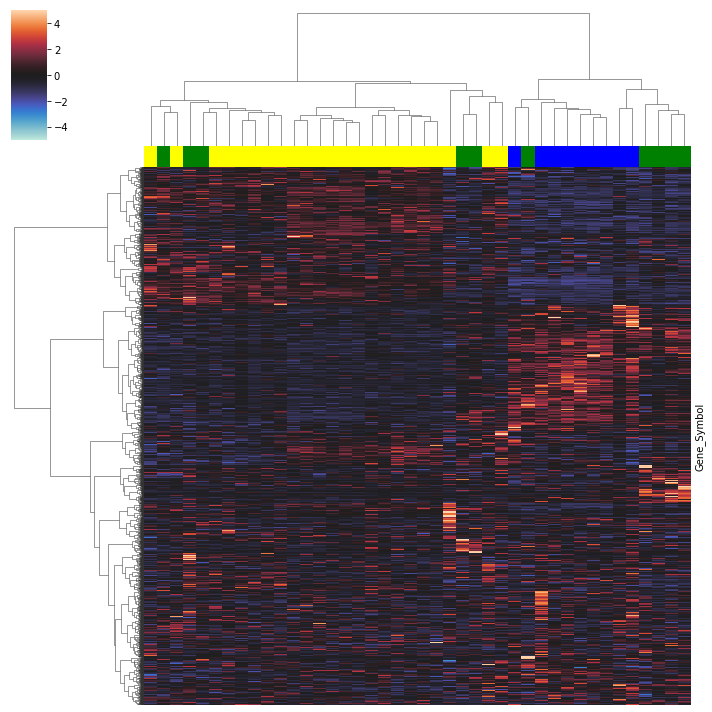

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv

df = pd.read_csv("Myc_Gene_Expression_Clustering.csv")
df = df.set_index('Gene_Symbol')
X = ['Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Green',
'Green',
'Green',
'Yellow',
'Blue',
'Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Blue',
'Yellow',
'Green',
'Green',
'Yellow',
'Blue',
'Green',
'Blue',
'Green',
'Blue',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Blue',
'Yellow',
'Blue']

# Standardize or Normalize every column in the figure

# Normalize
c1 = sns.clustermap(df,
               figsize=(10,10),
                linewidths=0,
                col_colors=X,
                yticklabels=False,
                xticklabels=False,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")
fig = c1.fig
fig.savefig("Myc_Gene_Expression_Clustering.png", dpi=600)
plt.show()

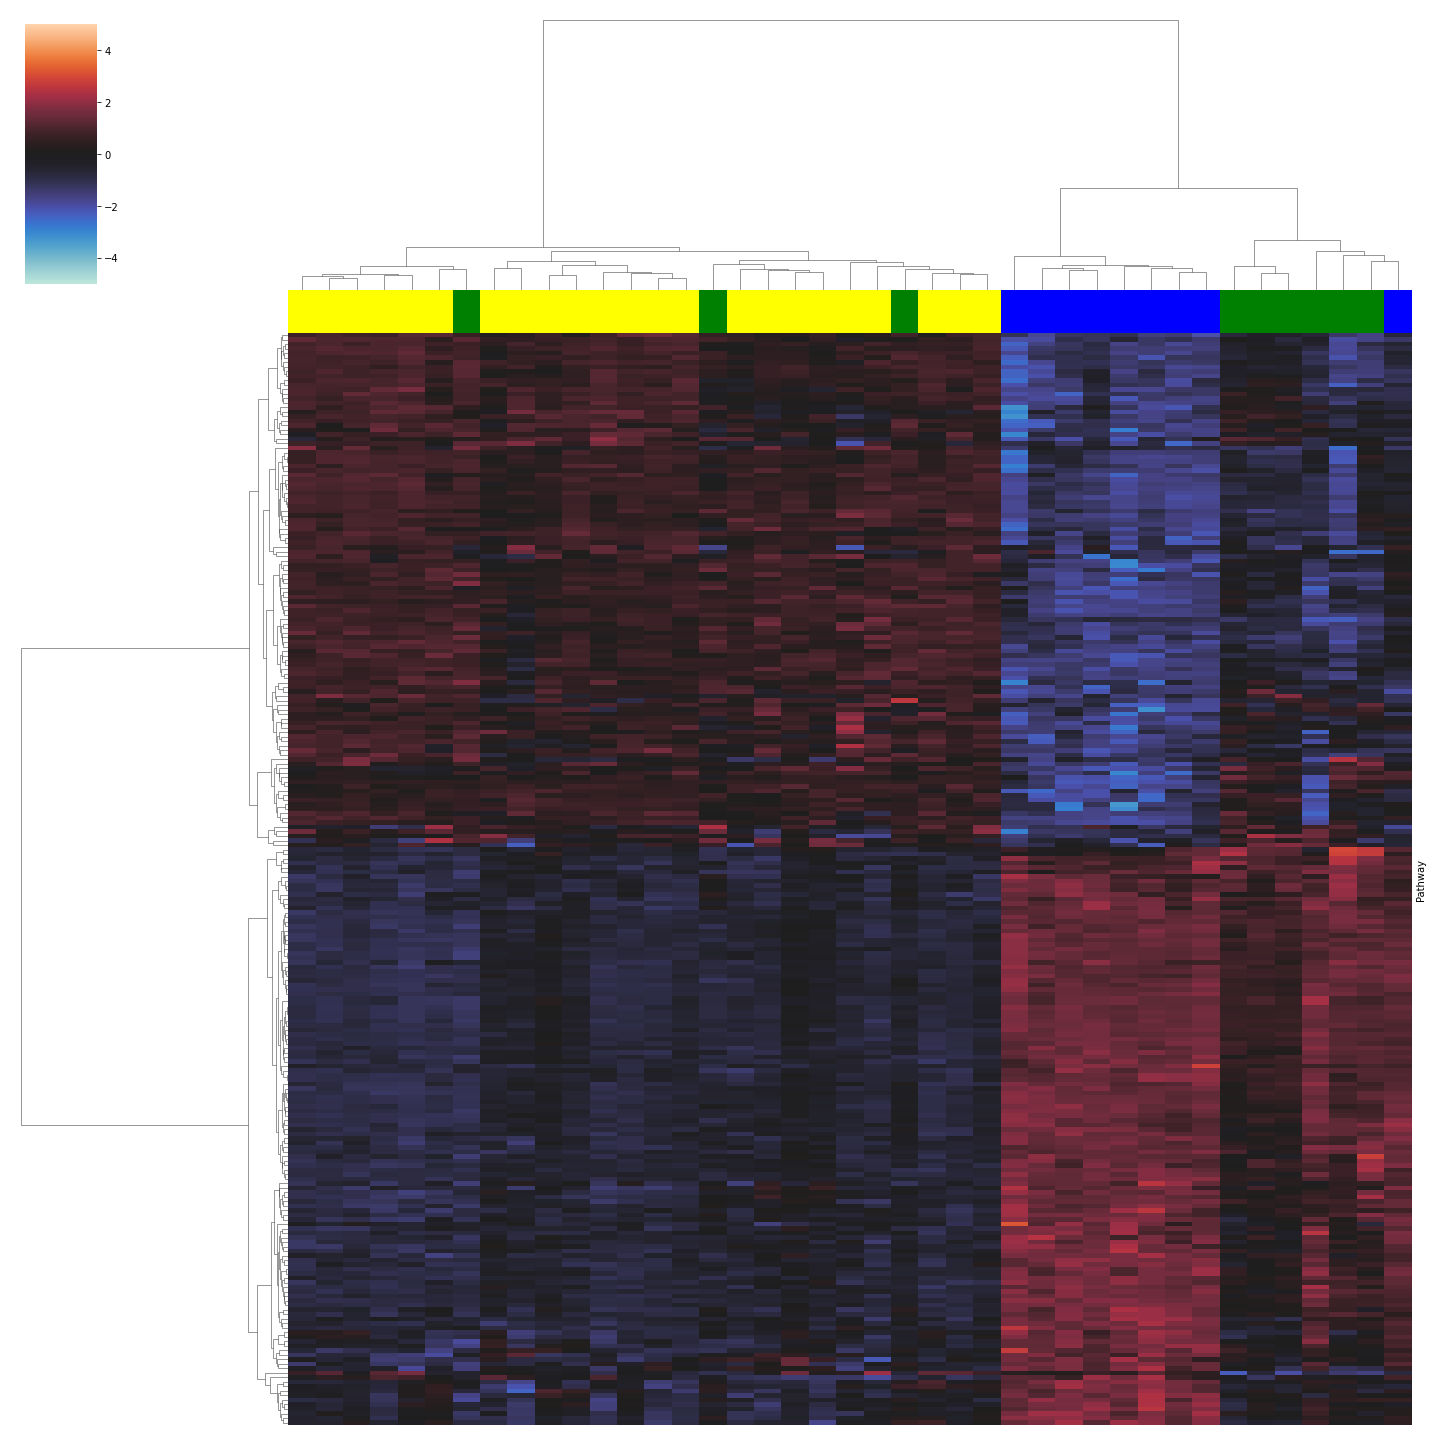

In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv

df = pd.read_csv("Top_Myc_Pathways_ssGSEA.csv")
network_pal = sns.light_palette('blue', len(df.Pathway.unique()))
network_lut = dict(zip(df.Pathway.unique(), network_pal))
networks = df.Pathway
network_colors = pd.Series(networks).map(network_lut)
df = df.set_index('Pathway')

X = ['Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Green',
'Green',
'Green',
'Green',
'Green',
'Green',
'Green',
'Green',
'Green',
'Blue',
'Blue',
'Blue',
'Blue',
'Blue',
'Blue',
'Blue',
'Blue',
'Blue']
# Standardize or Normalize every column in the figure

cmap = sns.diverging_palette(214, 60, l=45, s=200, center="dark", as_cmap=True)

# Normalize
c1 = sns.clustermap(df,
               figsize=(20,20),
                    linewidths=0,
                    yticklabels=False,
                    xticklabels=False,
                    col_colors=X,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")
fig = c1.fig
fig.savefig("Myc_C2_Pathway.svg", dpi=1200)
#plt.legend(labels=["Legend_Day1","Legend_Day2"])
plt.show()

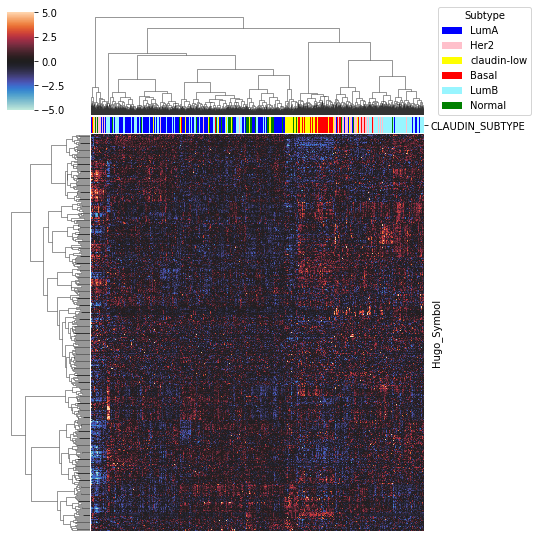

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
species = df.pop("CLAUDIN_SUBTYPE")
# Colors in order are LumA, Her2, Claudin-low, basal, LumB, Normal
lut = dict(zip(species.unique(), ["blue","pink","yellow","red","#98F5FF","green"]))
row_colors = species.map(lut)
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
df4 = pd.read_csv("Myc_Genes_Amp_Del_Differentially_Expressed.csv")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")
#df5 = df5.sample(250)

cmap = sns.diverging_palette(240, 60, l=70, s=200, center="dark", as_cmap=True)

c1 = sns.clustermap(df5,
               figsize=(7.5,7.5),
                linewidths=0,
                yticklabels=False,
                xticklabels=False,
                col_colors=row_colors,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")


handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Subtype', fontsize="medium",
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
fig = c1.fig
fig.savefig("Metabric_Heatmap_by_Mouse_Amp_Del_Deg.png", dpi=150)
plt.show()

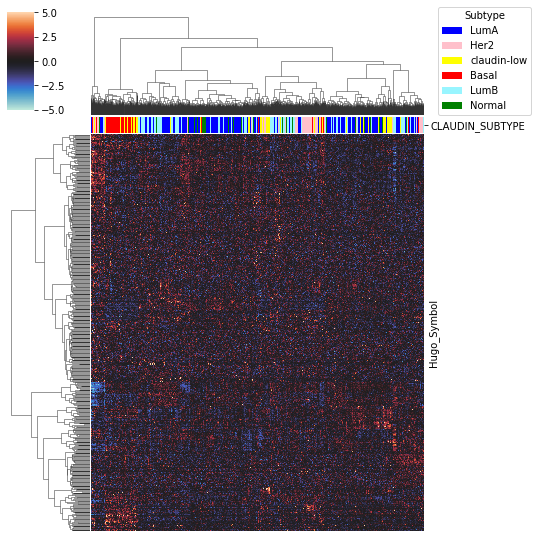

In [51]:
# Random selection of genes to sort Metabric data by
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
species = df.pop("CLAUDIN_SUBTYPE")
# Colors in order are LumA, Her2, Claudin-low, basal, LumB, Normal
lut = dict(zip(species.unique(), ["blue","pink","yellow","red","#98F5FF","green"]))
row_colors = species.map(lut)
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
# The following random state integer should match the integer at the end of the file name
df = df.sample(n=504, random_state=41)
df = df.astype(dtype="float64")


c1 = sns.clustermap(df,
               figsize=(7.5,7.5),
                linewidths=0,
                yticklabels=False,
                xticklabels=False,
                col_colors=row_colors,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")


handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Subtype', fontsize="medium",
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
fig = c1.fig
fig.savefig("Random_Metabric_Heatmap_Control_41.png", dpi=600)
plt.show()

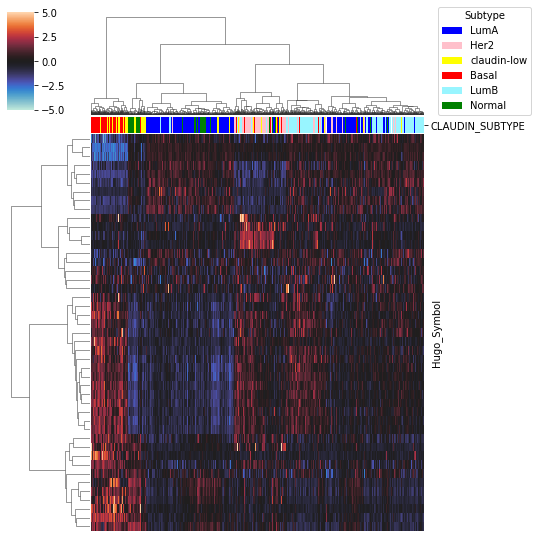

In [6]:
# PAM50 Gene List Limited
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
species = df.pop("CLAUDIN_SUBTYPE")
# Colors in order are LumA, Her2, Claudin-low, basal, LumB, Normal
lut = dict(zip(species.unique(), ["blue","pink","yellow","red","#98F5FF","green"]))
row_colors = species.map(lut)
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
#df4 = pd.read_csv("Myc_Genes_Amp_Del_Differentially_Expressed.csv")
df4 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet2")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")

cmap = sns.diverging_palette(240, 60, l=70, s=200, center="dark", as_cmap=True)

c1 = sns.clustermap(df5,
               figsize=(7.5,7.5),
                linewidths=0,
                yticklabels=False,
                xticklabels=False,
                col_colors=row_colors,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")


handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Subtype', fontsize="medium",
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right',)
fig = c1.fig
fig.savefig("Metabric_Heatmap_by_PAM50.png", dpi=150)
plt.show()

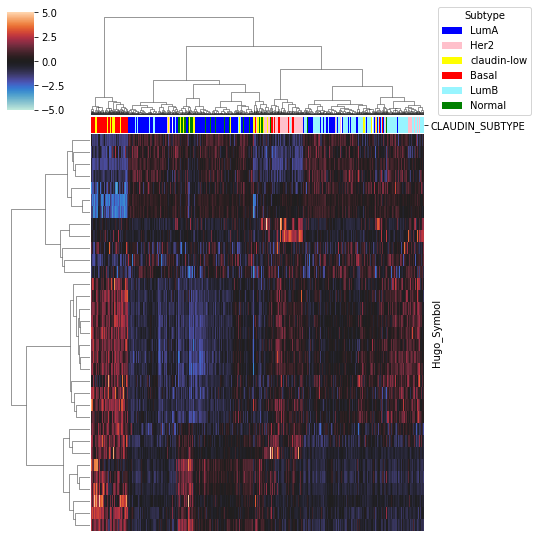

In [5]:
# 32 Optimized Gene List for Separating BRCA Subtypes
# Performed Feature Importance analysis using SGDClassifier log_loss, hinge, and logistic regression liblinear
# Each model was instantiated 7 separate times with summed scores used to rank genes
# Intersection of all three models was used to generate gene list
# RFECV using SVC Linear Kernel further refined this list down to 32 genes
# RFECV on PAM50 also yielded the same list of 32 genes, surprisingly
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
species = df.pop("CLAUDIN_SUBTYPE")
# Colors in order are LumA, Her2, Claudin-low, basal, LumB, Normal
lut = dict(zip(species.unique(), ["blue","pink","yellow","red","#98F5FF","green"]))
row_colors = species.map(lut)
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
#df4 = pd.read_csv("Myc_Genes_Amp_Del_Differentially_Expressed.csv")
df4 = pd.read_excel("Optimized_32_Gene_BRCA_Signature.xlsx", sheet_name="32_Genes_Only")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")

cmap = sns.diverging_palette(240, 60, l=70, s=200, center="dark", as_cmap=True)

c1 = sns.clustermap(df5,
               figsize=(7.5,7.5),
                linewidths=0,
                yticklabels=False,
                xticklabels=False,
                col_colors=row_colors,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")


handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Subtype', fontsize="medium",
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right',)
fig = c1.fig
fig.savefig("Metabric_Heatmap_Optimized_32.png", dpi=600)
plt.show()

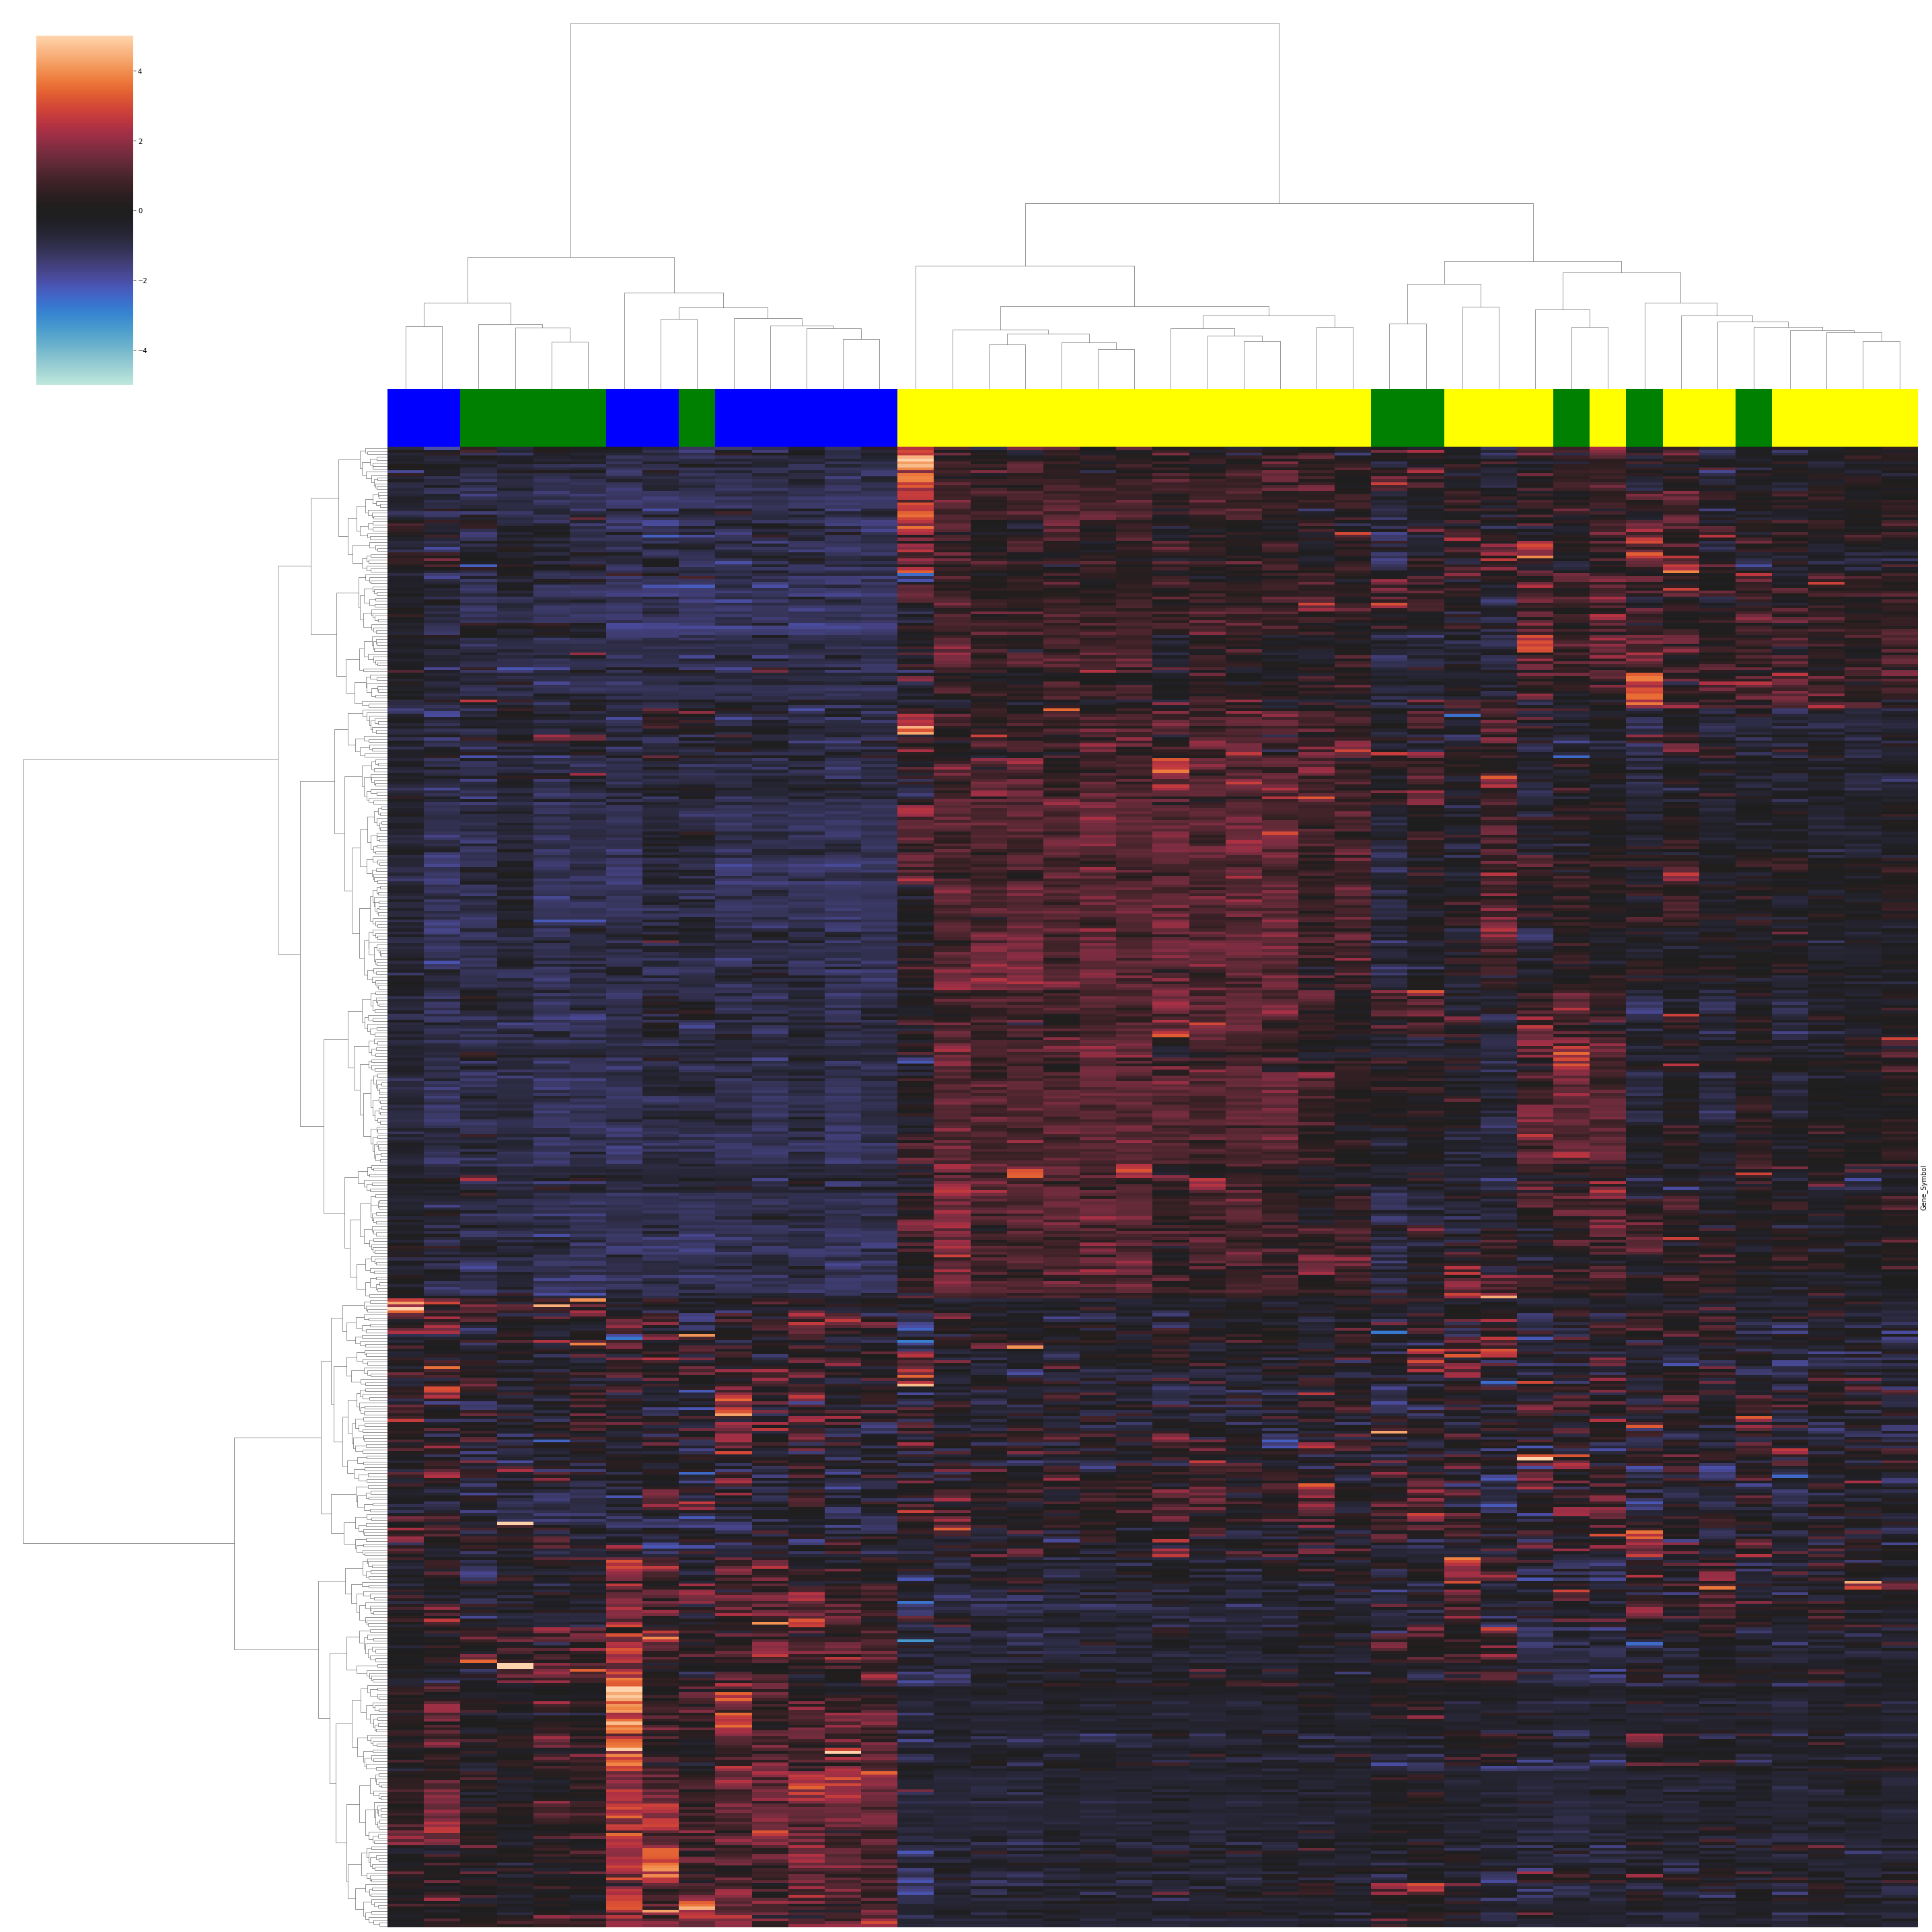

In [3]:
# Mouse hierarchical clustering by 505 gene set amplified or deleted and show gene expression changes between subtypes
# removed riken cDNA gene as there is no human homolog

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv

df2 = pd.read_csv("Myc_Gene_Expression_Clustering.csv")
#df2 = df2.set_index('Gene_Symbol')
df1 = pd.read_excel("Mouse_Myc_Amp_Del_Deg_Gene_Names.xlsx")
df = pd.merge(df2, df1, on=['Gene_Symbol'])
df = df.drop_duplicates(subset=['Gene_Symbol'], keep='first')
df = df.set_index('Gene_Symbol')
X = ['Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Green',
'Green',
'Green',
'Yellow',
'Blue',
'Blue',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Yellow',
'Blue',
'Yellow',
'Green',
'Green',
'Yellow',
'Blue',
'Green',
'Blue',
'Green',
'Blue',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Green',
'Yellow',
'Blue',
'Yellow',
'Blue']

# Standardize or Normalize every column in the figure

# Normalize
c1 = sns.clustermap(df,
               figsize=(40,40),
                linewidths=0,
                col_colors=X,
                yticklabels=False,
                xticklabels=False,
               metric="euclidean",
               cmap="icefire",
                vmin=-5,
                vmax=5,
               z_score=0,
               method="ward")
fig = c1.fig
fig.savefig("Mouse_Heatmap_by_Mouse_Amp_Del_Deg.png", dpi=600)
plt.show()